# Task 4: Temporal change in unit water footprint (uWF)

We create a heatmap to visualize the temporal change in uWF per country within 15 years (2001-2016)

In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/projects/uWF101/"
fil =  "watertofood_uWF-weight_15crops_15countries_1960-2016_5perc.csv"  
df = pd.read_csv(path+fil,) #, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
del df["Unnamed: 0"]
df.head()

,Years,Item Name,Country Name,Item Category,Weight_t,uWF
0,1961,Apples,Austria,Fruits,456000.0,67.596703
1,1961,Apples,France,Fruits,2141999.0,314.213013
2,1961,Apples,Germany,Fruits,851001.0,147.557999
3,1961,Apples,Greece,Fruits,196000.0,1032.219971
4,1961,Apples,Hungary,Fruits,349500.0,793.695984


In [96]:
df_mean_items_countries = df[["Country Name","Item Name",
    "uWF"]].groupby(["Item Name","Country Name"]).agg("mean").unstack().T
df_mean_items_countries = df_mean_items_countries.loc["uWF",:]

df_std_items_countries = df[["Country Name","Item Name",
    "uWF"]].groupby(["Item Name","Country Name"]).agg("std").unstack().T
df_std_items_countries  = df_std_items_countries.loc["uWF",:]

df_diff_2001_16 = df.loc[df["Years"]>=2014,["Country Name","Item Name",
    "uWF"]].groupby(["Item Name","Country Name"]).agg("mean").unstack().T - df.loc[(df["Years"]>=2000)&(df["Years"]<=2002),["Country Name","Item Name",
    "uWF"]].groupby(["Item Name","Country Name"]).agg("mean").unstack().T
df_diff_2001_16  = df_diff_2001_16.loc["uWF",:]


# Statistics
## 1. Mean unit water footprints

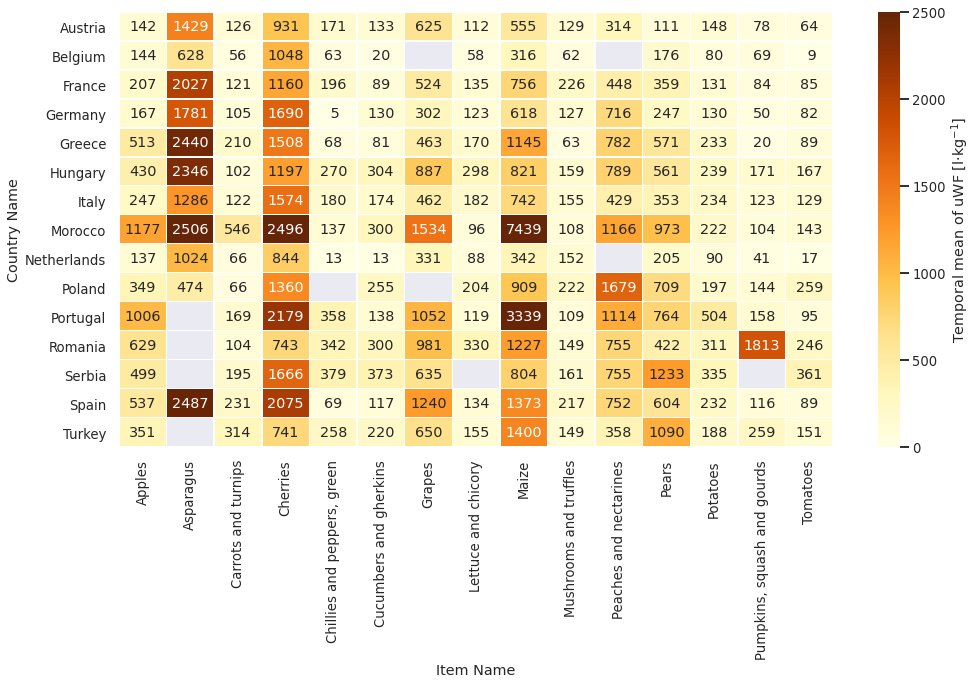

In [68]:
# Initialize plotting by setting theme
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)

# Plot heatmap for average uWF over all years WITHOUT standardization per item
f4, ax4 = plt.subplots(figsize=(16, 8))  # initialize plot
c4 = sns.heatmap(df_mean_items_countries, 
                 annot=True, fmt="2.0f", linewidths=.5,
            ax=ax4, cbar=True, cmap='YlOrBr', vmin=0, vmax=2500,
            cbar_kws={"label":"Temporal mean of uWF [l$\cdot$kg$^{-1}$]"});

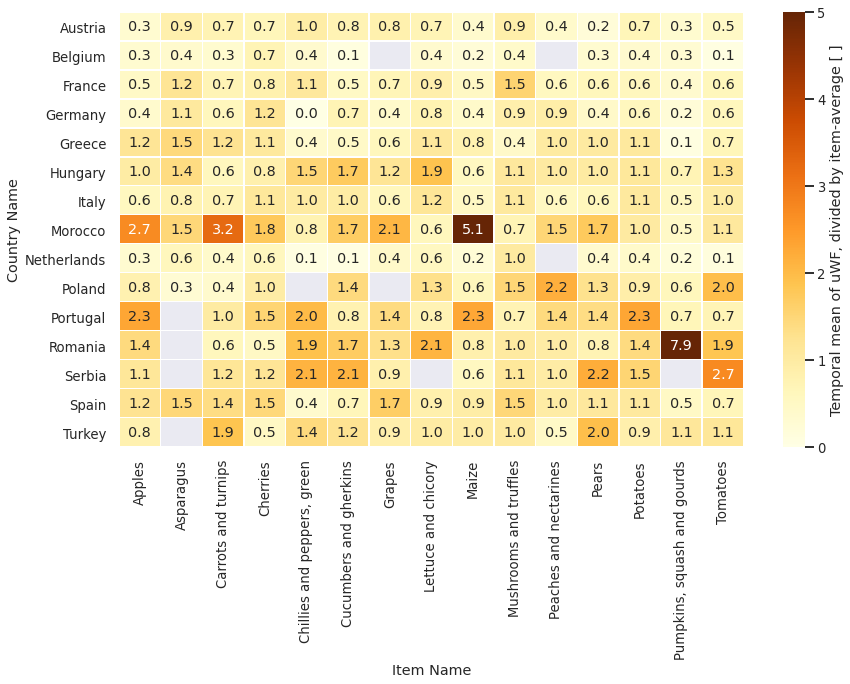

In [70]:
# Plot heatmap for time-average uWF divided by item-average
f4, ax4 = plt.subplots(figsize=(14, 8))  # initialize plot
c4 = sns.heatmap((df_mean_items_countries/df_mean_items_countries.mean(axis=0)), 
                 annot=True, fmt="2.1f", linewidths=.5, 
            ax=ax4, center=2.5, cbar=True, cmap='YlOrBr', vmin=0, vmax=5,
            cbar_kws={"label":"Temporal mean of uWF, divided by item-average [ ]"});

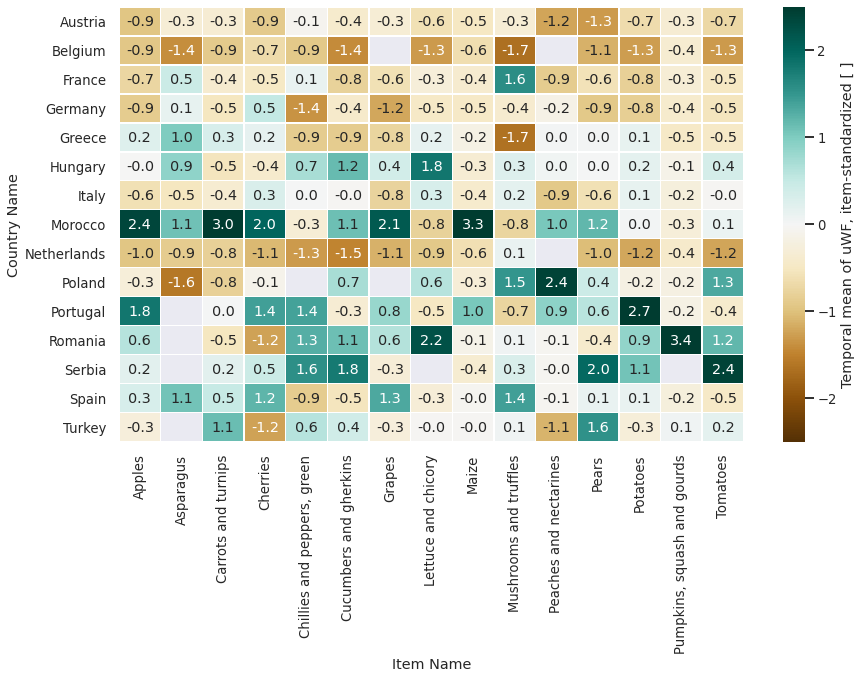

In [71]:
# Plot heatmap for average uWF over all years WITH item standardization (x-x_mean)/x_std
f4, ax4 = plt.subplots(figsize=(14, 8))  # initialize plot
c4 = sns.heatmap((df_mean_items_countries-df_mean_items_countries.mean(axis=0))
                 /df_mean_items_countries.std(axis=0), 
                 annot=True, fmt="2.1f", linewidths=.5, 
            ax=ax4, center=0, cbar=True, cmap='BrBG', vmin=-2.5, vmax=2.5,
            cbar_kws={"label":"Temporal mean of uWF, item-standardized [ ]"});


## 2. Standard deviation of unit water footprint over whole time period

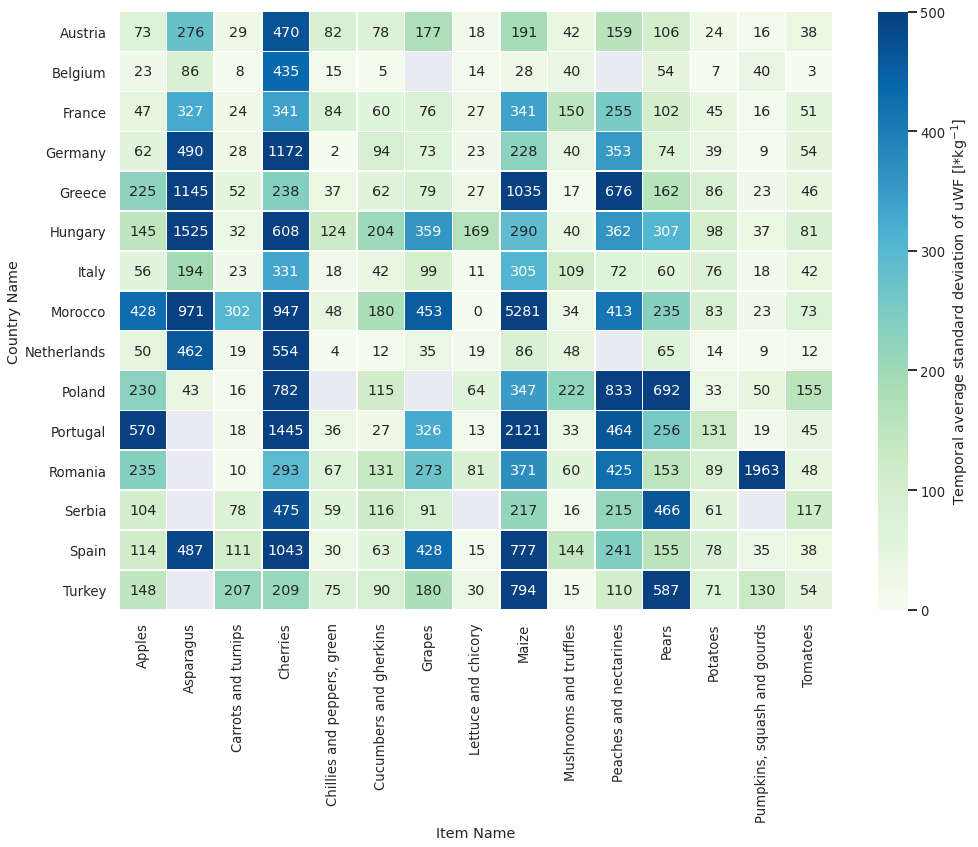

In [72]:
# Plot heatmap for correlation of average uWF over all years
f3, ax3 = plt.subplots(figsize=(16, 11))  # initialize plot
c3 = sns.heatmap(df_std_items_countries, annot=True, fmt="2.0f", linewidths=.5, 
            ax=ax3, center=250, cbar=True, cmap='GnBu', vmin=0, vmax=500,
            cbar_kws={"label":"Temporal average standard deviation of uWF [l$*$kg$^{-1}$]"});


## 3. Difference of uWF between 2001 and 2016 (using 3yr-averages) 

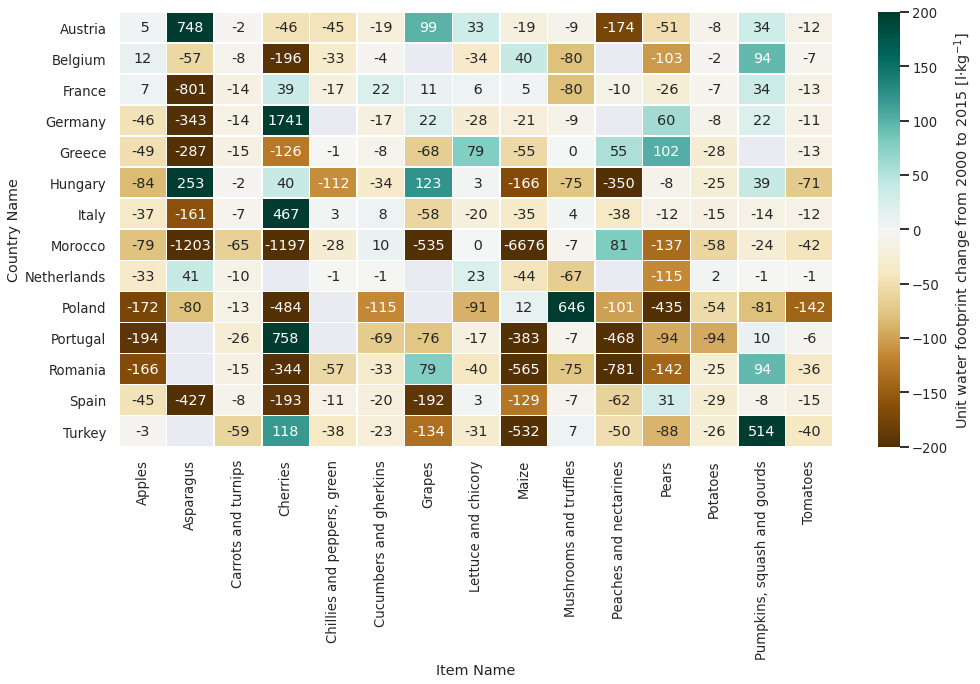

In [125]:
# Plot heatmap for diffs per country and item
        # df_diff_2001_16.drop(labels="Serbia",inplace=True)
f, ax = plt.subplots(figsize=(16, 8))  # initialize plot

sns.heatmap(df_diff_2001_16, annot=True, fmt="2.0f", linewidths=.5, 
            ax=ax, center=0, cbar=True, cmap='BrBG', vmin=-200, vmax=200,
            cbar_kws={"label":"Unit water footprint change from 2000 to 2015 [l$\cdot$kg$^{-1}$]"});

# blue colors (positive values) correspond to increase in uWF; brownish colors to decrease

In [129]:
print((df_diff_2001_16<-10).sum(axis=1).sort_values(),"\n",
      (df_diff_2001_16>=10).sum(axis=1).sort_values())
print("\nincrease (%): ",(df_diff_2001_16>10).sum().sum()/(14*15.-df_diff_2001_16.isna().sum().sum()),
      "\nno change (%): ",(np.abs(df_diff_2001_16)<10).sum().sum()/(14*15.-df_diff_2001_16.isna().sum().sum()),
      "\ndecrease (%): ",(df_diff_2001_16<-10).sum().sum()/(14*15.-df_diff_2001_16.isna().sum().sum()),
      "\n\n no data: ",df_diff_2001_16.isna().sum().sum()/(14*15.-df_diff_2001_16.isna().sum().sum()))
print(df_diff_2001_16.shape)

Country Name
Netherlands     5
Belgium         6
Austria         7
France          7
Germany         7
Greece          8
Hungary         8
Portugal        9
Italy          10
Spain          10
Turkey         10
Morocco        11
Poland         11
Romania        12
dtype: int64 
 Country Name
Italy          1
Morocco        1
Portugal       1
Spain          1
Netherlands    2
Poland         2
Romania        2
Turkey         2
Belgium        3
Greece         3
Austria        4
France         4
Germany        4
Hungary        4
dtype: int64

increase (%):  0.17346938775510204 
no change (%):  0.20918367346938777 
decrease (%):  0.6173469387755102 

 no data:  0.07142857142857142
(14, 15)


In [130]:
print((df_diff_2001_16<-10).sum(axis=0).sort_values(),"\n",
      (df_diff_2001_16>=10).sum(axis=0).sort_values())


Item Name
Pumpkins, squash and gourds     3
Mushrooms and truffles          5
Grapes                          6
Cherries                        7
Lettuce and chicory             7
Asparagus                       8
Chillies and peppers, green     8
Cucumbers and gherkins          8
Carrots and turnips             9
Peaches and nectarines          9
Potatoes                        9
Apples                         10
Pears                          10
Maize                          11
Tomatoes                       11
dtype: int64 
 Item Name
Carrots and turnips            0
Chillies and peppers, green    0
Potatoes                       0
Tomatoes                       0
Apples                         1
Cucumbers and gherkins         1
Mushrooms and truffles         1
Maize                          2
Peaches and nectarines         2
Asparagus                      3
Lettuce and chicory            3
Pears                          3
Grapes                         5
Cherries                  

## 4. Timeseries per Item Name for all countries and whole time period

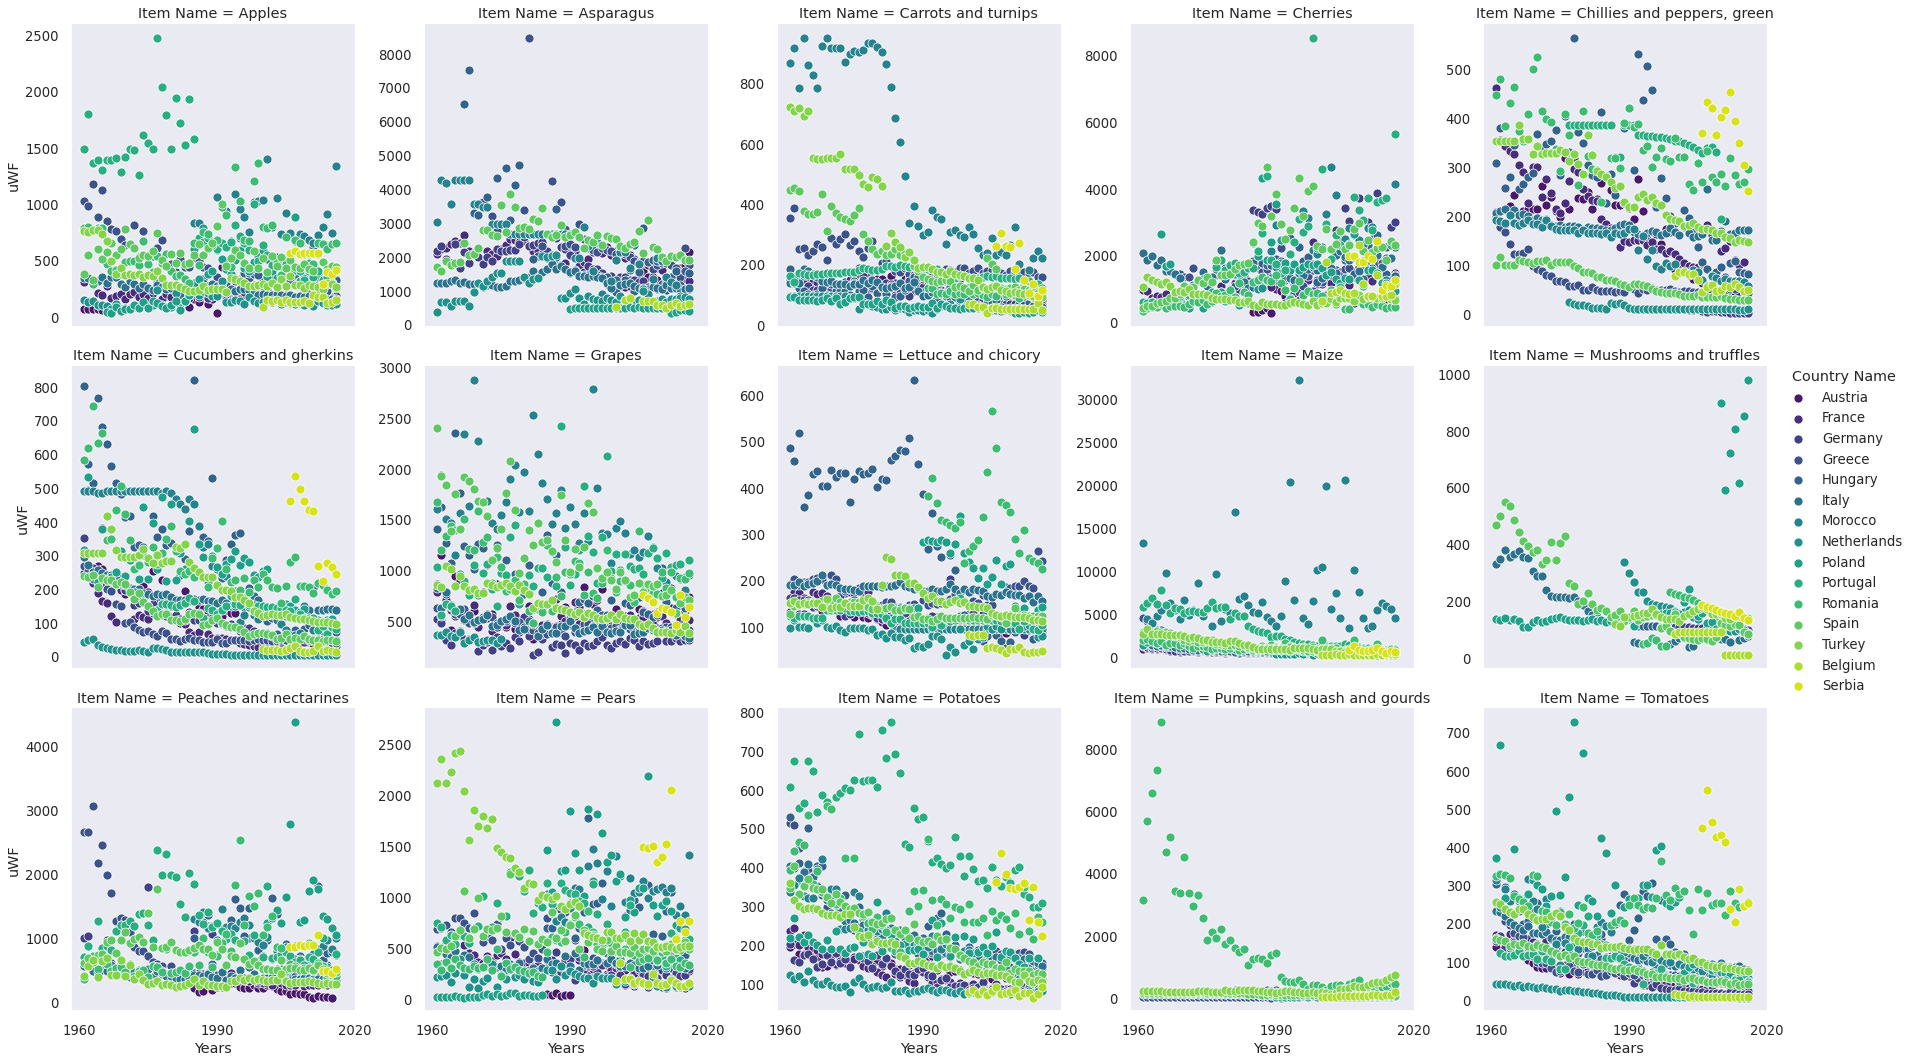

In [131]:
#df.loc[df["uWF"]>5000,"uWF"] = np.nan
g = sns.FacetGrid(df, col="Item Name", sharey=False, hue="Country Name",
                  col_wrap=5, height=5, palette=pal, subplot_kws={"alpha": 0.3})
g.map(sns.scatterplot, "Years", "uWF")
g.set(xticks=[1960, 1990, 2020])
g.add_legend();

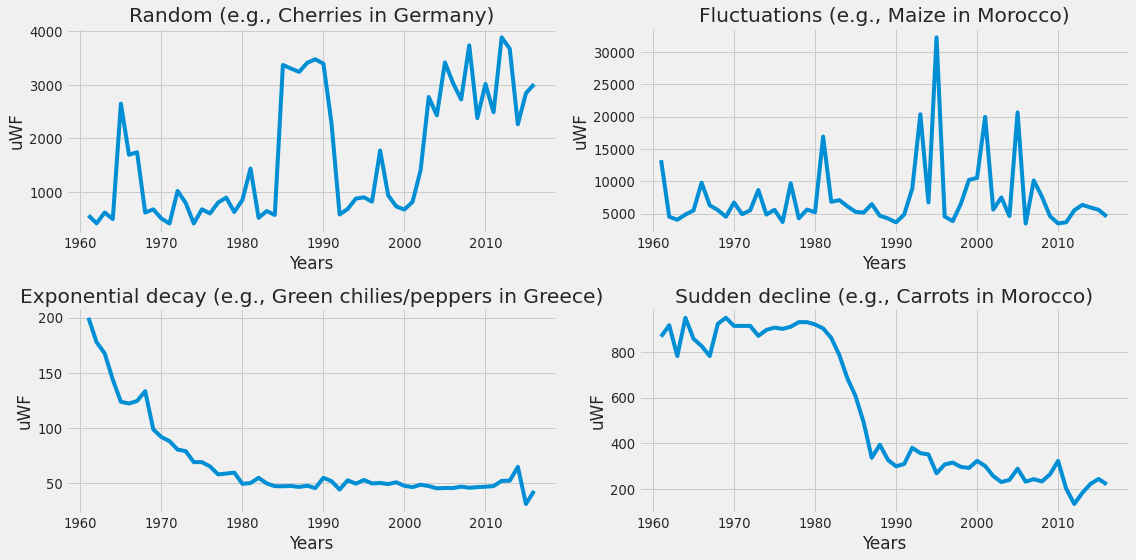

In [180]:
sns.set_theme(context='talk', style='white', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(2,2,figsize=[16,8])

mask = (df["Item Name"]=="Cherries") & (df["Country Name"]=="Germany")
df_00 = df.loc[mask,["Years","uWF"]]
sns.lineplot(x="Years", y="uWF", data=df_00, ax=ax[0,0]);
ax[0,0].set(title="Random (e.g., Cherries in Germany)");

mask = (df["Item Name"]=="Maize") & (df["Country Name"]=="Morocco")
df_01 = df.loc[mask,["Years","uWF"]]
sns.lineplot(x="Years", y="uWF", data=df_01, ax=ax[0,1]);
ax[0,1].set(title="Fluctuations (e.g., Maize in Morocco)")

mask = (df["Item Name"]=="Chillies and peppers, green") & (df["Country Name"]=="Greece")
df_10 = df.loc[mask,["Years","uWF"]]
sns.lineplot(x="Years", y="uWF", data=df_10, ax=ax[1,0]);
ax[1,0].set(title="Exponential decay (e.g., Green chilies/peppers in Greece)");

mask = (df["Item Name"]=="Carrots and turnips") & (df["Country Name"]=="Morocco")
df_11 = df.loc[mask,["Years","uWF"]]
sns.lineplot(x="Years", y="uWF", data=df_11, ax=ax[1,1]);
ax[1,1].set(title="Sudden decline (e.g., Carrots in Morocco)");

plt.tight_layout()

## 5. Correlation of mean uWF for each item 

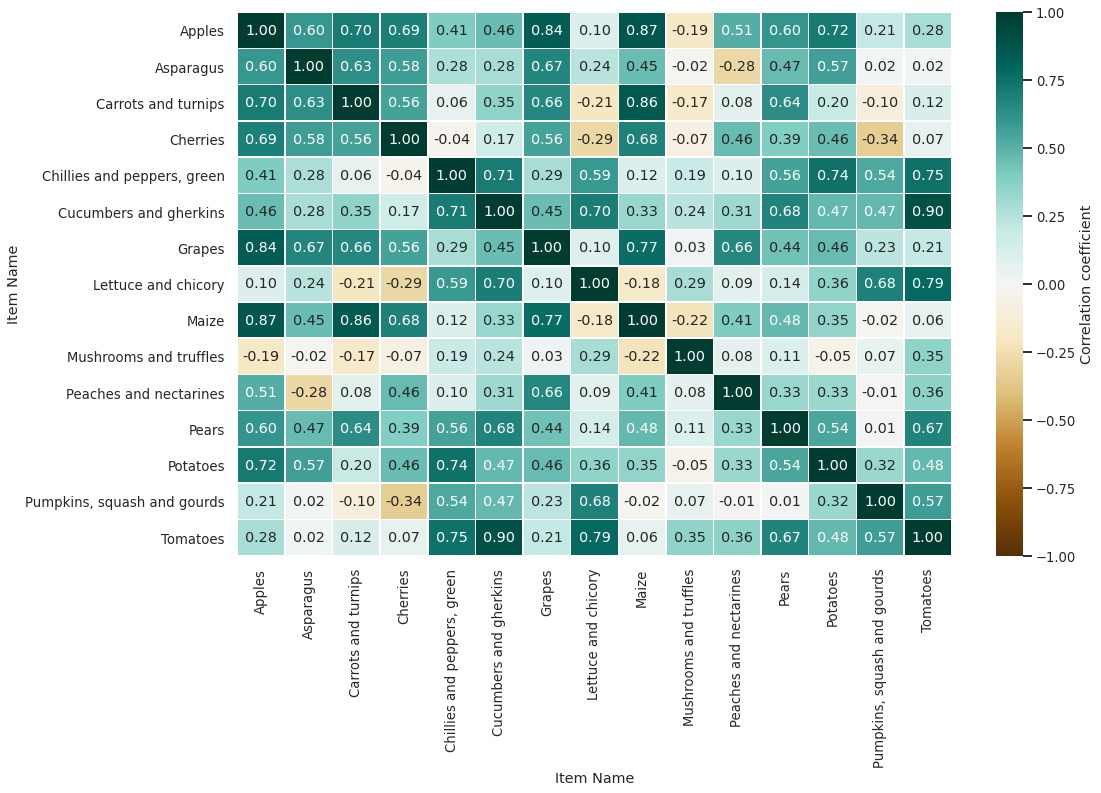

In [132]:
# Plot heatmap for correlation of average uWF over all years
f2, ax2 = plt.subplots(figsize=(16, 10))  # initialize plot
co = sns.heatmap(df_mean_items_countries.corr(), annot=True, fmt="2.2f", linewidths=.5, 
            ax=ax2, center=0, cbar=True, cmap='BrBG', vmin=-1, vmax=1,
            cbar_kws={"label":"Correlation coefficient"});


In [28]:
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
pal = sns.color_palette("viridis", len(dfpl["Country Name"].unique()))


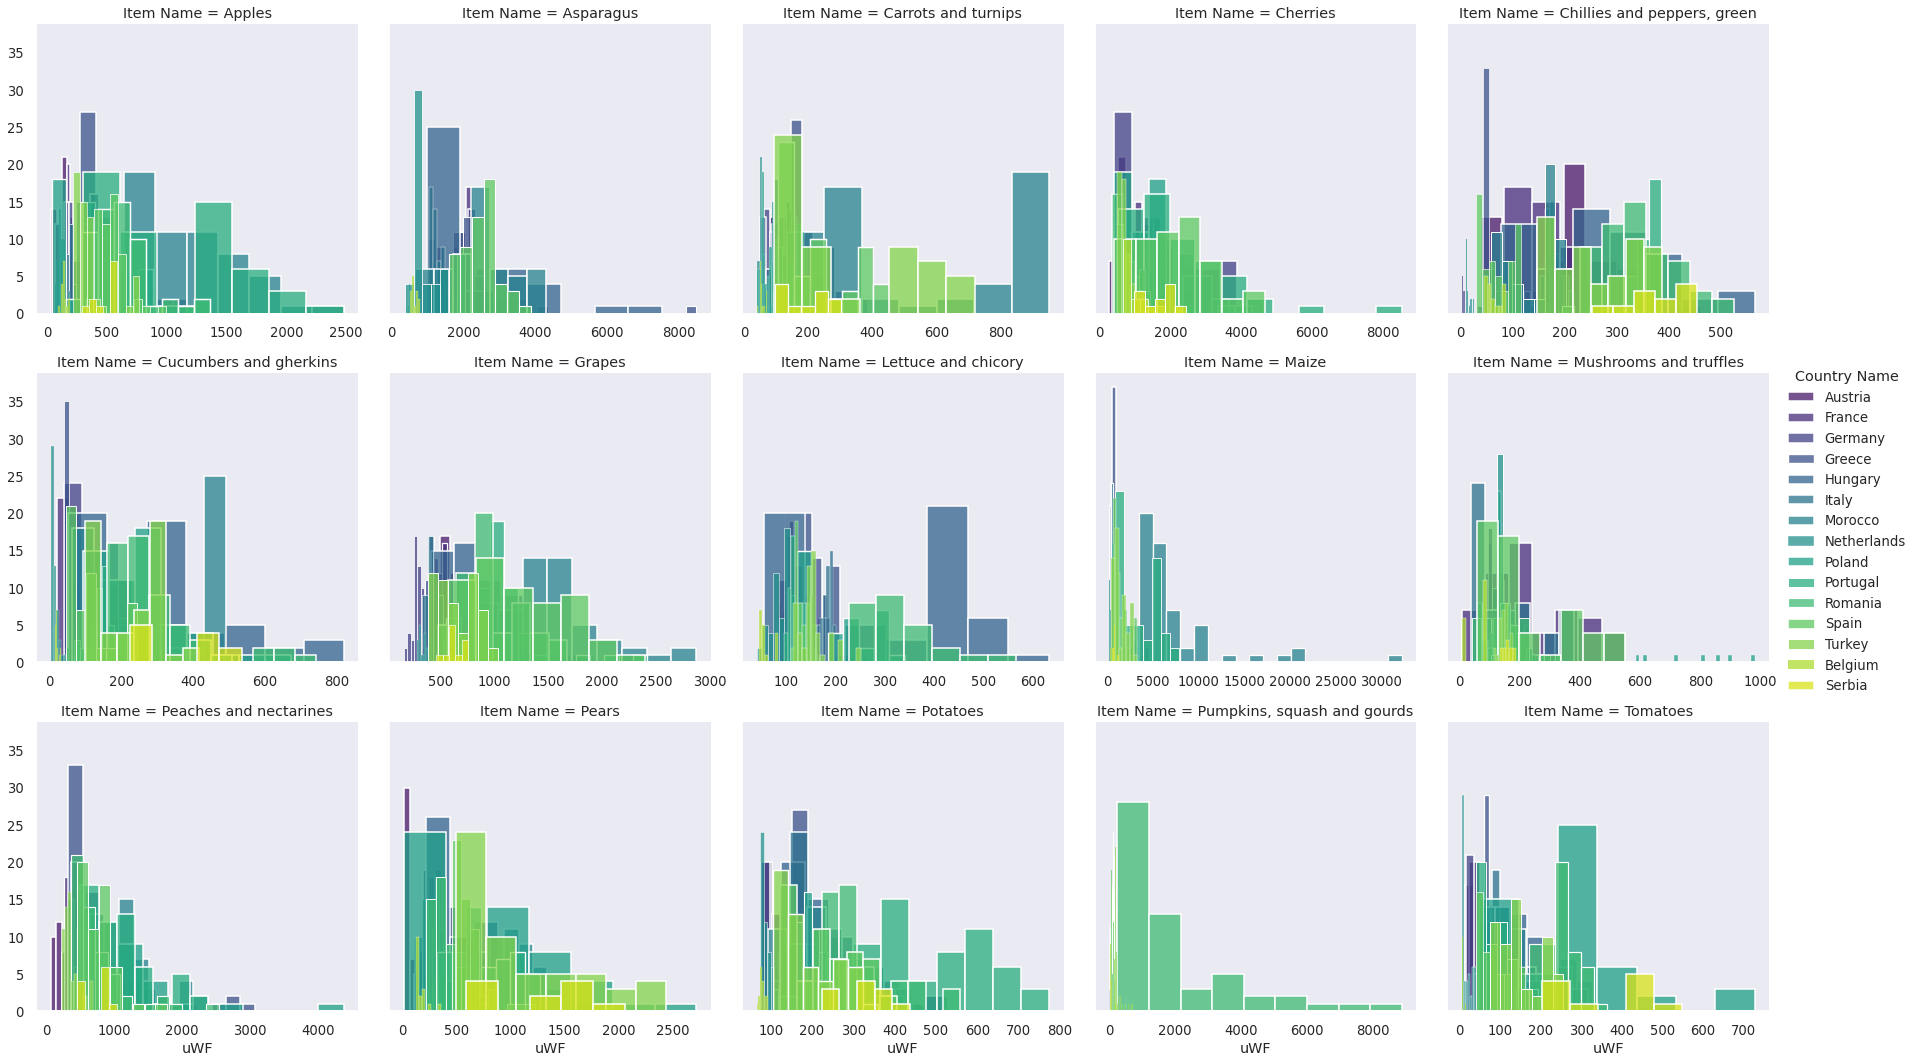

In [133]:
g = sns.FacetGrid(df, col="Item Name", sharex=False, hue="Country Name",
                  col_wrap=5, height=5, palette=pal)
g.map(sns.histplot, "uWF",)
#g.set(xticks=[1960, 1990, 2020])
g.add_legend();